In [45]:
# from https://towardsdatascience.com/perceptron-and-its-implementation-in-python-f87d6c7aa428

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

def load_data_show():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(url, header=None)
    print(data)
load_data_show()    

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


In [46]:
def load_data():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(url, header=None)
    data = data[:100] #取数据前100个
    data[4] = np.where(data.iloc[:, -1] == 'Iris-setosa', 0, 1) # np.where(cond,x,y)：满足条件（cond）输出x，不满足输出y
    #利用np.where来对数据进行分类，满足'Iris-setosa'的输入0，不满足输入1，类似与PAL算法中的输出，要么-1，要么+1
    data = np.asmatrix(data, dtype='float64') #np.asmatrix(x, dtype='y') x-输入数据 y-数据类型
    #将数据构建成一个矩阵，数据类型为float64
    return data

data = load_data()

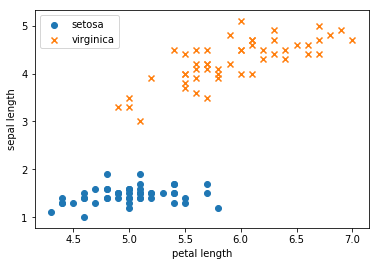

In [47]:
plt.scatter(np.array(data[:50, 0]), np.array(data[:50, 2]), marker='o', label='setosa')
plt.scatter(np.array(data[50:, 0]), np.array(data[50:, 2]), marker='x', label='virginica')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

In [48]:
def Perceptron(data, num_iter):
    features = data[:, :-1]
    labels   = data[:, -1]
    
    w = np.zeros(shape=(1, features.shape[1] + 1))
    
    misclassified_list = [] #误分类点
    
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x, 0, 1)
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else 0.0
            delta = (label.item(0,0) - target)
            
            if(delta):
                misclassified += 1
                w += (delta * x)
        misclassified_list.append(misclassified)
    return (w, misclassified_list)

num_iter = 10
w, misclassified_list = PLA(data, num_iter)          

In [2]:
#other implement code

import numpy as np

class Perceptron(object):
    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
        
    
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
            activation = 1
        else:
            activation = 0
        return activation
    
    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
                



In [1]:
import numpy as np

training_inputs = []
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

labels = np.array([1, 0, 0, 0])

perceptron = Percepton(2)
perceptron.train(training_inputs, labels)

inputs = np.array([1, 1])
perceptron.predict(inputs)

i

NameError: name 'np' is not defined